In [2]:
# import the neccessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


RAW_DATA_PATH = "..\\..\\data\\raw\\Telecom Customers Churn.csv"

In [3]:
# load the data
df = pd.read_csv(RAW_DATA_PATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# checking basic dataset information

# shape of dataframe
df.shape

(7043, 21)

In [5]:
# columns/attributes in df
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [8]:
# finding all categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'object']
categorical

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [9]:
# view the categorical variables
df[categorical].head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [10]:
# statistics on numerical data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# statistics on non-numerical data
df.describe(include=["object"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [12]:
# check for null values
df.count().sort_values()

customerID          7043
MonthlyCharges      7043
PaymentMethod       7043
PaperlessBilling    7043
Contract            7043
StreamingMovies     7043
StreamingTV         7043
TechSupport         7043
DeviceProtection    7043
TotalCharges        7043
OnlineBackup        7043
InternetService     7043
MultipleLines       7043
PhoneService        7043
tenure              7043
Dependents          7043
Partner             7043
SeniorCitizen       7043
gender              7043
OnlineSecurity      7043
Churn               7043
dtype: int64

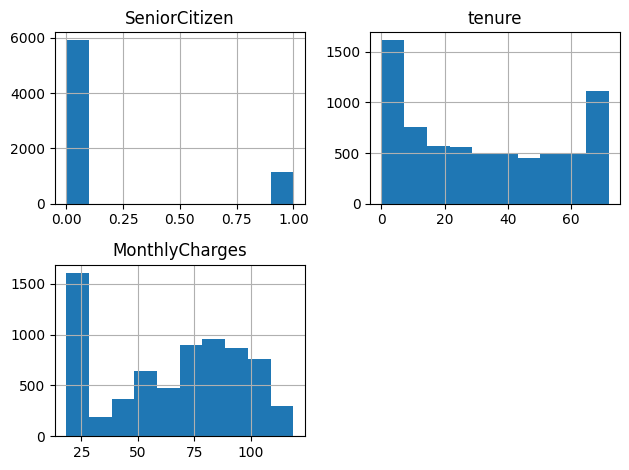

In [13]:
# univariate analysis of numerical features using histogram
df.hist()
plt.tight_layout()
plt.show()

In [14]:
# count the unique values in descending order for the target variable churn
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
# calculate the fraction of the value counts for churn
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

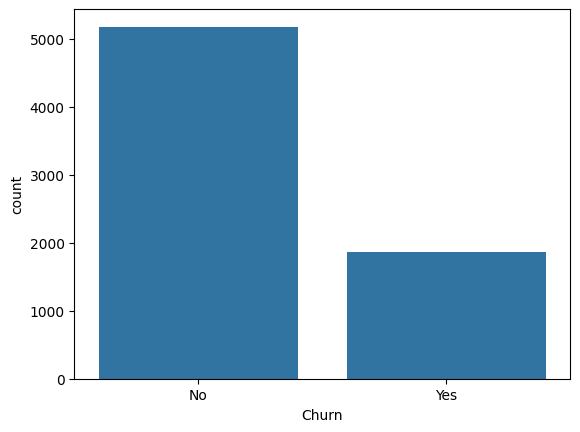

In [16]:
# plot of the unique values in churn

sns.countplot(data=df, x="Churn")

In [17]:
# count the unique values for the variable payment method
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [18]:
# calculate the fraction of the value counts for payment method
df["PaymentMethod"].value_counts(normalize=True)

PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64

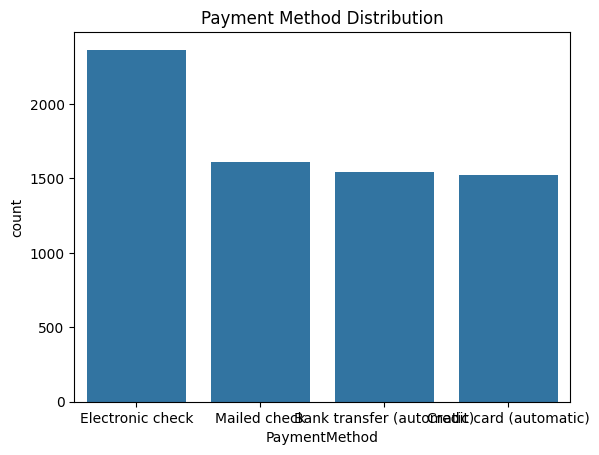

In [19]:
# analysis of payment method distribution
sns.countplot(data=df, x='PaymentMethod')
plt.title("Payment Method Distribution")
plt.show()

In [20]:
# count the unique values for the variable gender
df["gender"].value_counts()


gender
Male      3555
Female    3488
Name: count, dtype: int64

In [21]:
# calculate the fraction of the value counts for gender
df["gender"].value_counts(normalize=True)

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

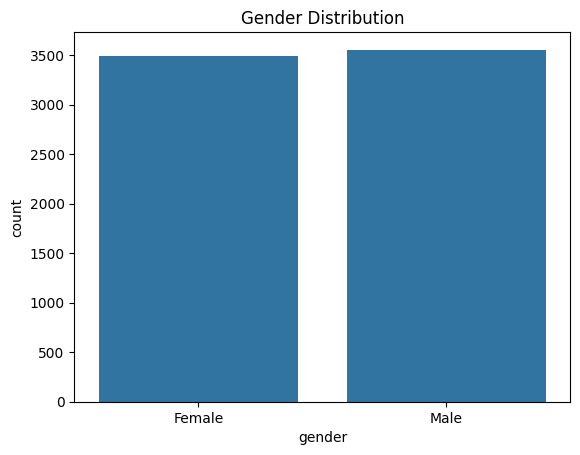

In [22]:
# analysis of the variable partner distribution
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.show()

In [23]:
# count the unique values for the variable partner
df["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

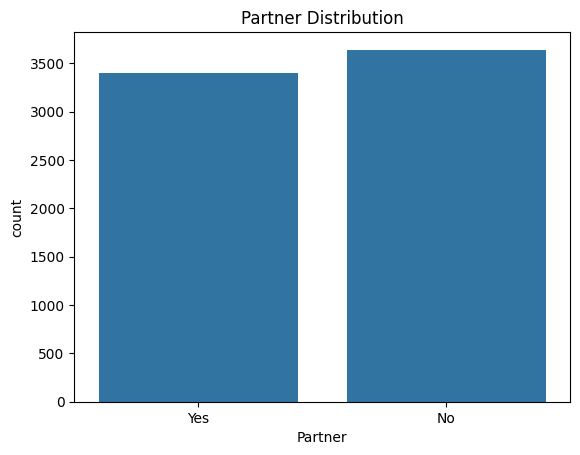

In [24]:
# analysis of variable partner distribution
sns.countplot(data=df, x='Partner')
plt.title("Partner Distribution")
plt.show()

In [25]:
# count the unique values for the variable dependents
df["Dependents"].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

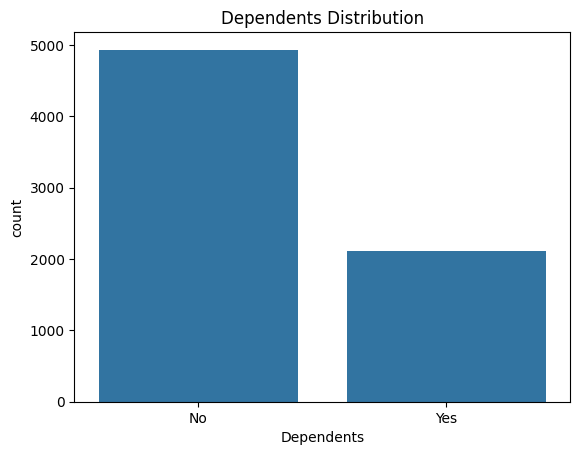

In [26]:
# analysis of variable dependents distribution
sns.countplot(data=df, x='Dependents')
plt.title("Dependents Distribution")
plt.show()

In [27]:
# count the unique values for the variable phoneService
df["PhoneService"].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

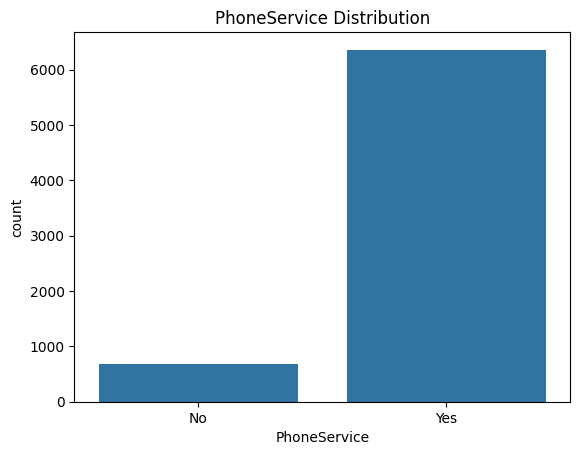

In [28]:
# analysis of variable phoneService distribution
sns.countplot(data=df, x='PhoneService')
plt.title("PhoneService Distribution")
plt.show()

In [29]:
# count the unique values for the variable multipleLines
df["MultipleLines"].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

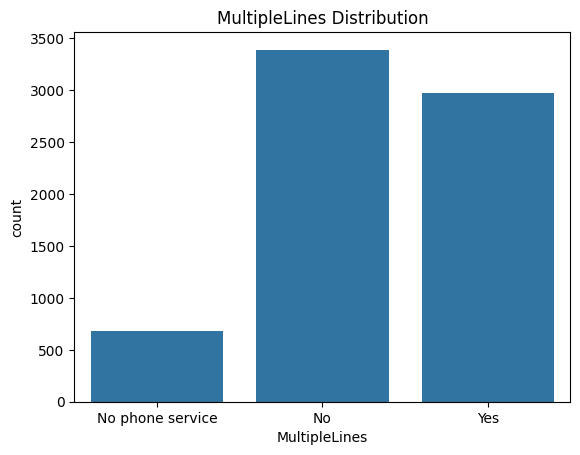

In [30]:
# analysis of variable multipleLines distribution
sns.countplot(data=df, x='MultipleLines')
plt.title("MultipleLines Distribution")
plt.show()

In [31]:
# count the unique values for the variable internetService
df["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

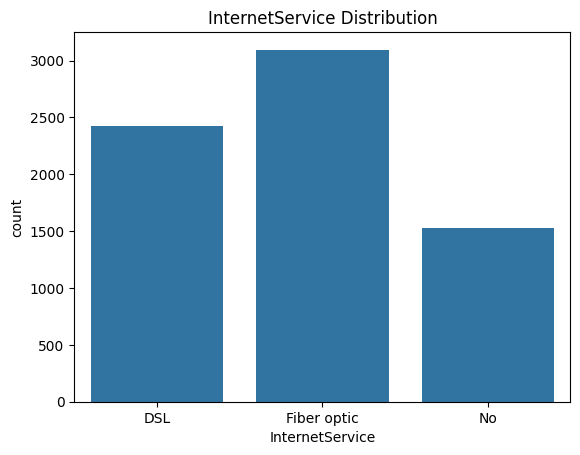

In [32]:
# analysis of variable internetService distribution
sns.countplot(data=df, x='InternetService')
plt.title("InternetService Distribution")
plt.show()

In [33]:
# count the unique values for the variable onlineSecurity
df["OnlineSecurity"].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

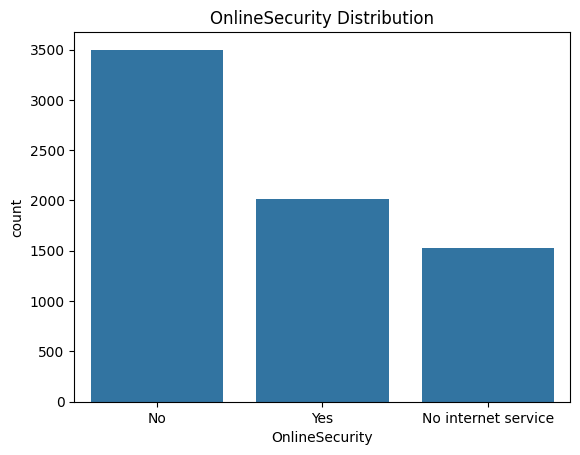

In [34]:
# analysis of variable OnlineSecurity distribution
sns.countplot(data=df, x='OnlineSecurity')
plt.title("OnlineSecurity Distribution")
plt.show()

In [35]:
# count the unique values for the variable OnlineBackup
df["OnlineBackup"].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

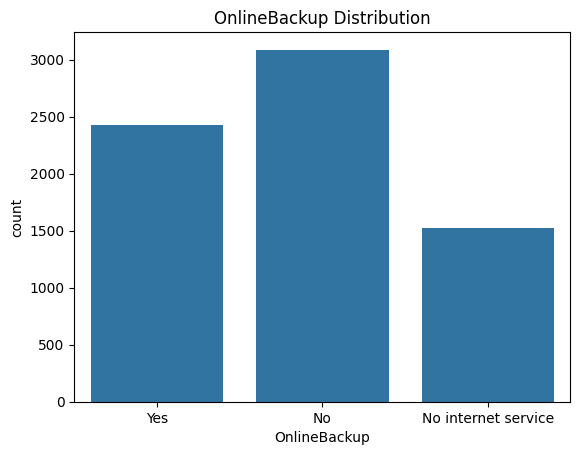

In [36]:
# analysis of variable OnlineBackup distribution
sns.countplot(data=df, x='OnlineBackup')
plt.title("OnlineBackup Distribution")
plt.show()

In [37]:
# count the unique values for the variable DeviceProtection
df["DeviceProtection"].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

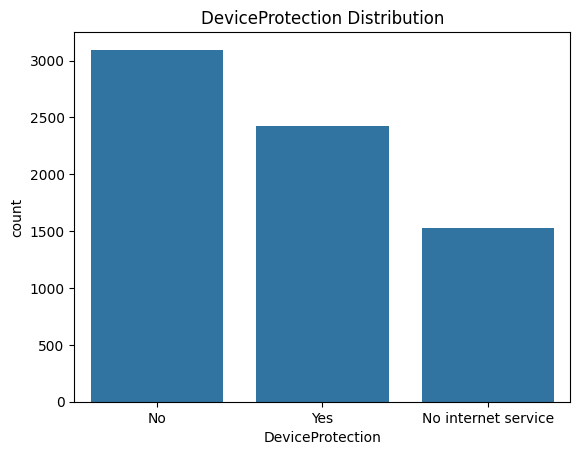

In [38]:
# analysis of variable DeviceProtection distribution
sns.countplot(data=df, x='DeviceProtection')
plt.title("DeviceProtection Distribution")
plt.show()

In [39]:
# count the unique values for the variable TechSupport
df["TechSupport"].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

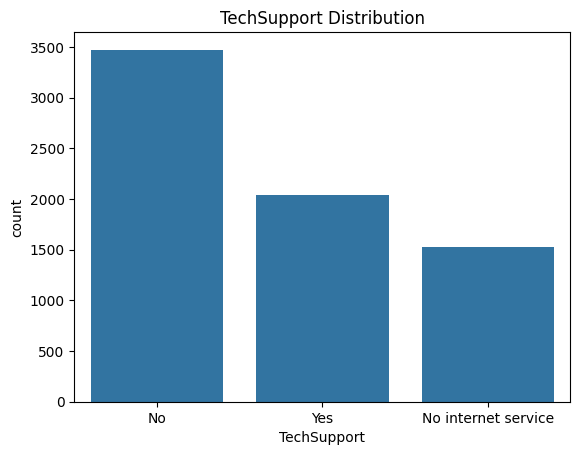

In [40]:
# analysis of variable TechSupport distribution
sns.countplot(data=df, x='TechSupport')
plt.title("TechSupport Distribution")
plt.show()

In [41]:
# count the unique values for the variable StreamingTV
df["StreamingTV"].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

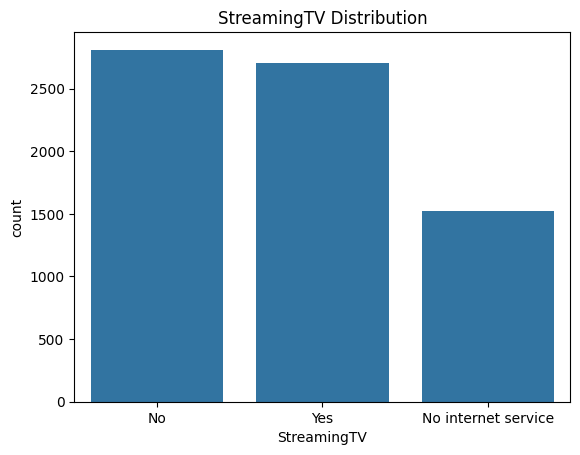

In [42]:
# analysis of variable StreamingTV distribution
sns.countplot(data=df, x='StreamingTV')
plt.title("StreamingTV Distribution")
plt.show()

In [43]:
# count the unique values for the variable StreamingMovies
df["StreamingMovies"].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

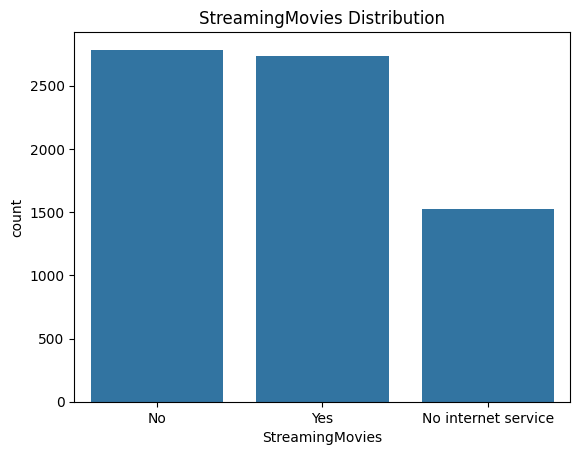

In [44]:
# analysis of variable StreamingMovies distribution
sns.countplot(data=df, x='StreamingMovies')
plt.title("StreamingMovies Distribution")
plt.show()

In [45]:
# count the unique values for the variable Contract
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

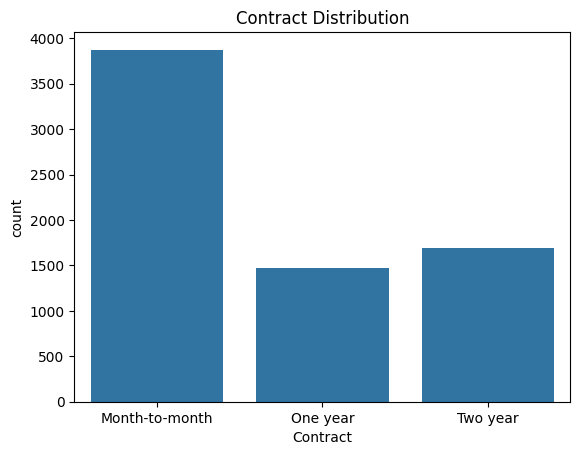

In [46]:
# analysis of variable Contract distribution
sns.countplot(data=df, x='Contract')
plt.title("Contract Distribution")
plt.show()

In [47]:
# count the unique values for the variable PaperlessBilling
df["PaperlessBilling"].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

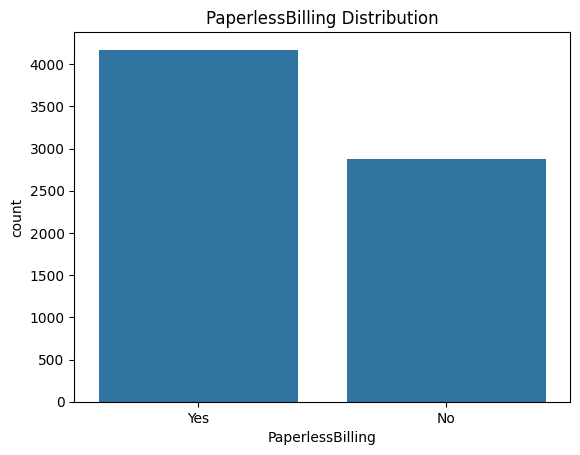

In [48]:
# analysis of variable PaperlessBilling distribution
sns.countplot(data=df, x='PaperlessBilling')
plt.title("PaperlessBilling Distribution")
plt.show()

In [49]:
# count the unique values for the variable TotalCharges
df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

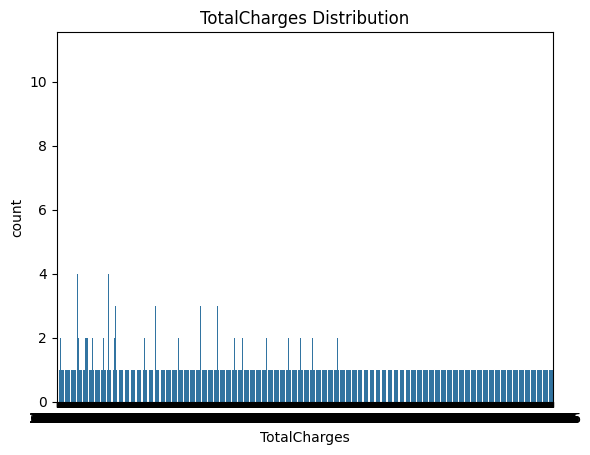

In [50]:
# analysis of variable TotalCharges distribution
sns.countplot(data=df, x='TotalCharges')
plt.title("TotalCharges Distribution")
plt.show()

In [51]:
# counting the non-null items in total charges
tc = [var for var in df['TotalCharges'] if var != " "]
len(tc)

7032

In [52]:
# since the data in TotalCharges is numerical but has been 
# written as an object, we will change the data into an integer

In [53]:
# Bivariate analysis

In [54]:
# bivariate analysis of churn and senior citizen
df.groupby('Churn')['SeniorCitizen'].mean()

Churn
No     0.128721
Yes    0.254682
Name: SeniorCitizen, dtype: float64

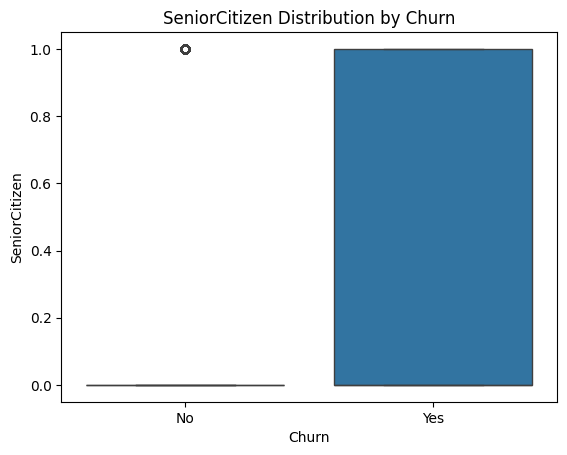

In [55]:
sns.boxplot(data=df, x='Churn', y='SeniorCitizen')
plt.title("SeniorCitizen Distribution by Churn")
plt.show()

In [56]:
from scipy.stats import ttest_ind

group1 = df[df['Churn'] == 0]['SeniorCitizen']
group2 = df[df['Churn'] == 1]['SeniorCitizen']
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-Test p-value: {p_value}")

T-Test p-value: nan


C:\Users\Debbie\AppData\Local\Temp\ipykernel_65308\2139953430.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(group1, group2)


In [57]:
# bivariate analysis between Partner and Churn
pd.crosstab(df['Partner'], df['Churn'], margins=True)

Churn,No,Yes,All
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
All,5174,1869,7043


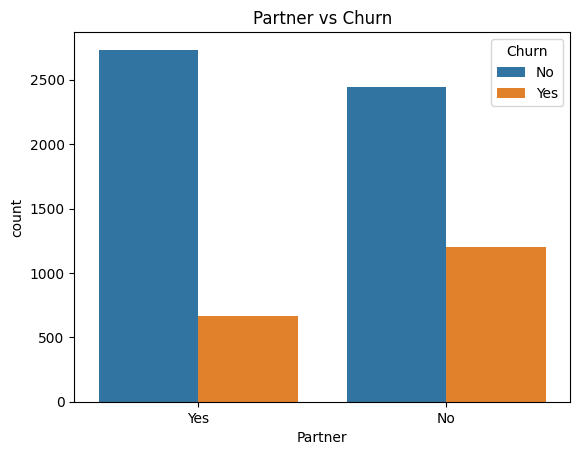

In [58]:
sns.countplot(data=df, x='Partner', hue='Churn')
plt.title("Partner vs Churn")
plt.show()

In [59]:
# bivariate analysis between Dependents and Churn
pd.crosstab(df['Dependents'], df['Churn'], margins=True)

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
All,5174,1869,7043


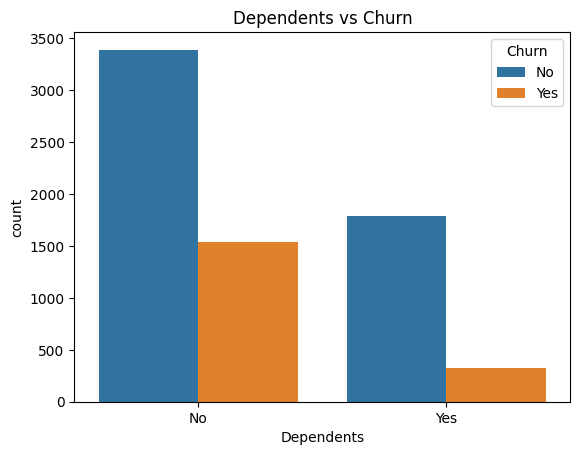

In [60]:
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title("Dependents vs Churn")
plt.show()

In [61]:
df['tenure'].info

<bound method Series.info of 0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64>

In [62]:
# bivariate analysis between tenure and Churn
df.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

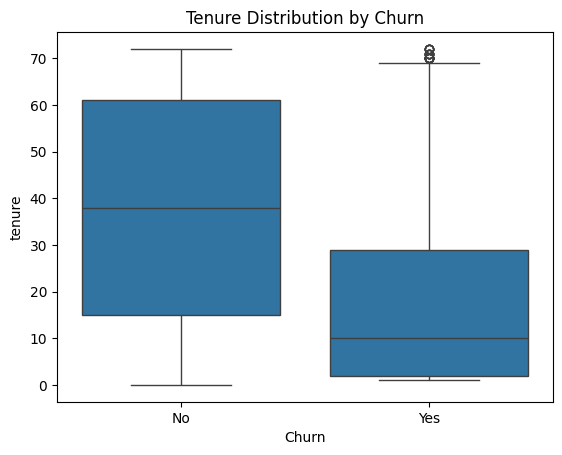

In [63]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure Distribution by Churn")
plt.show()

<Axes: xlabel='Churn', ylabel='tenure'>

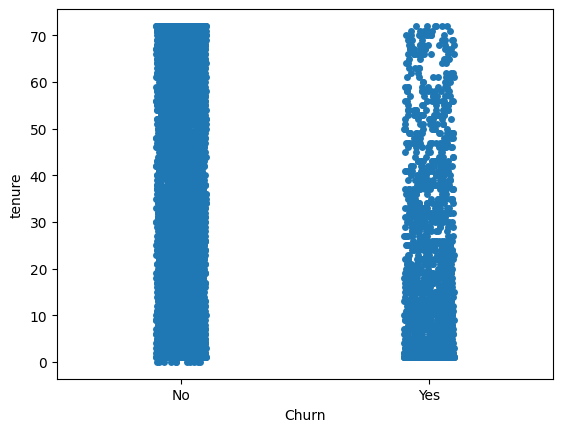

In [64]:
sns.stripplot(data=df, x='Churn', y='tenure', jitter=True)

<Axes: xlabel='Churn', ylabel='tenure'>

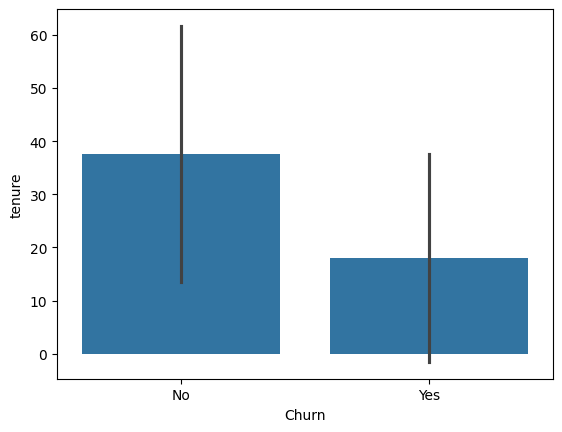

In [69]:
sns.barplot(data=df, x='Churn', y='tenure', errorbar='sd')